# Lab 4: K-NN and SVM

This lab is designed to challenge you to apply existing knowledge from previous lectures into real-world practices. We will be writing codes to practice k-nearest neighbours and support vector machines. You might encounter some errors early, so please don't start late!


### Instructions
1. This lab uses a dataset uploaded to https://miamioh.instructure.com/files/31267620

2. There are `NO` restrictions on library use. Feel free to simplify your code as you wish.

3. Make sure all plots, outputs and intermediate results are visible in the final pdf that you submit.

### Submission guide
Save a copy as UniqueID_Lab4.ipynb and submit the pdf file to Canvas, or a link to the file is ok. Make sure it is shared.

# Q1: K-Nearest Neighbours (15 pts)
You are given a dataset of handwritten digits consisting of $8\times8$ images with intensity ranging from $[0,16]$ and you will use k-nearest neighbours algorithm to classify the digits.

Load the input using `sklearn.load_digits()` file.

In [48]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

### Dataset Preparation

In [12]:
# loading the dataset into a pandas dataframe
# load from sklearn.load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
print(len(digits.target), len(df))

df['target'] = digits.target

# show first 5 rows of the dataframe
df.head()

1797 1797


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
# print the number of distinct labels
print(f'The total no of distinct labels are {len(np.unique(df.target))}.')

# print the number of features
print(f'The total no of features are {len(df.columns) - 1}.')

The total no of distinct labels are 10.
The total no of features are 64.


In [23]:
# make the train-test split in 80:20 ratio
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# normalize the X_train and X_test datasets by the min and max values
# i.e. all values must lie between 0 and 1
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

### Distances

In [25]:
# Calculate the euclidean distance between two images
def euclidean_distance(v1, v2):
    distance = 0
    
    for i in range(len(v1)):
        distance += (v1[i] - v2[i]) ** 2
    
    return np.sqrt(distance)

In [26]:
# Define the absolute distance between the two images
# Absolute distance is sum(abs(pixel_of_image_1 - pixel_of_image_2))
def absolute_distance(v1, v2):
    # Check if both vectors have the same length
    if len(v1) != len(v2):
        raise ValueError("Both images must have the same number of pixels.")
    
    # Compute the absolute distance by summing the absolute differences
    return sum(abs(p1 - p2) for p1, p2 in zip(v1, v2))

### K-NN Algorithm

In [31]:
def k_nearest_neighbors(X_train, y_train, X_test, k, distance_metric='euclidean'):
    # Select the distance function based on the metric
    if distance_metric == 'euclidean':
        distance_func = euclidean_distance
    elif distance_metric == 'absolute':
        distance_func = absolute_distance
    else:
        raise ValueError("Unsupported distance metric. Choose 'euclidean' or 'absolute'.")

    y_pred = []  # List to store predictions for each test instance
    
    for x in X_test:
        # Calculate distances between x and each point in X_train
        distances = [(distance_func(x, x_train), y) for x_train, y in zip(X_train, y_train)]
        
        # Sort distances by the distance value and select the k nearest neighbors
        distances.sort(key=lambda d: d[0])
        k_neighbors = [label for _, label in distances[:k]]
        
        # Predict the label based on the k nearest neighbors
        y_pred.append(predict_label(k_neighbors))
    
    return y_pred


In [32]:
from collections import Counter

def predict_label(k_neighbors):
    # Count occurrences of each label in the k nearest neighbors
    label_counts = Counter(k_neighbors)
    
    # Select the label with the highest frequency
    predicted_label = label_counts.most_common(1)[0][0]
    
    return predicted_label

In [33]:
# Change value of K to see how the algorithm changes
K = 5

In [ ]:
# Print the accuracy obtained with knn + euclidean distance
# for all data in X_test, call k_nearest_neighbors with distance_metric='euclidean'

y_pred = k_nearest_neighbors(X_train, y_train, X_test, k=K, distance_metric='euclidean')

score = accuracy_score(y_test, y_pred)
print(score)

0.9805555555555555


In [38]:
# Print the accuracy obtained with knn + absolute distance
y_pred = k_nearest_neighbors(X_train, y_train, X_test, k=K, distance_metric='absolute')

score = accuracy_score(y_test, y_pred)
print(score)

0.9722222222222222


# Q2: Support Vector Machines (5 pts)
You are given the breast cancer dataset that classifies tumors as malignant or benign and you will use the support vector machine model to classify.

Load the data using `sklearn.load_breast_cancer`.

Load the SVM model from `sklearn.svm.SVC`. The kernel argument should be `linear`.

In [40]:
# import necessary libraries
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer


### Data Preparation

In [41]:
# Follow the same steps as Q1
# Make a dataframe and print
# show first 5 rows of the dataframe

brest_cancer_data = load_breast_cancer()
df = pd.DataFrame(data=brest_cancer_data.data, columns=brest_cancer_data.feature_names)
df['target'] = brest_cancer_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
# Make the train-test split in 80:20 ratio
# Normalize the X_train and X_test datasets by the min and max values
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

### SVM Model

In [43]:
# Train an SVM model using SVC from sklearn
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict the class for the test dataset
y_pred = model.predict(X_test)

In [44]:
# Print the accuracy of the classification
print(accuracy_score(y_test, y_pred))

0.9649122807017544


# Q4: SVM Kernel Trick (10 pts)
You are given two datasets $(x_1,x_2,y)$ and $(x_1',x_2',y')$ that are not linearly separable. You will be applying the following kernel transpositions to transform the data into linearly separable.

1. $(x_1,x_2,y)$: `polynomial`
2. $(x_1',x_2',y')$: `radial basis function (rbf)`

The dataset is uploaded to Canvas $\rightarrow$ Files $\rightarrow$ Datasets $\rightarrow$ `Lab4_SVM_data.csv`.

In [45]:
# load the dataset and print first 5 rows
df = pd.read_csv('Lab4_SVM_data.csv')
print(df.head())

         x1        x2  y      x1--      x2--  y--
0 -3.434105  4.258806  0  0.020212  0.001178    0
1  3.835387  3.879707  0  0.021794  0.003593    0
2 -4.098312 -3.196508  0  0.027433  0.004555    0
3  0.774232 -5.170819  0  0.035840  0.008300    0
4  4.368539 -2.437044  0  0.059940  0.015158    0


### Polynomial

This data is from `x1, x2, y`

Compute a new feature $z = x_1^2 + x_2^2$

         x1        x2  y      x1--      x2--  y--          z
0 -3.434105  4.258806  0  0.020212  0.001178    0  29.930510
1  3.835387  3.879707  0  0.021794  0.003593    0  29.762324
2 -4.098312 -3.196508  0  0.027433  0.004555    0  27.013821
3  0.774232 -5.170819  0  0.035840  0.008300    0  27.336801
4  4.368539 -2.437044  0  0.059940  0.015158    0  25.023316


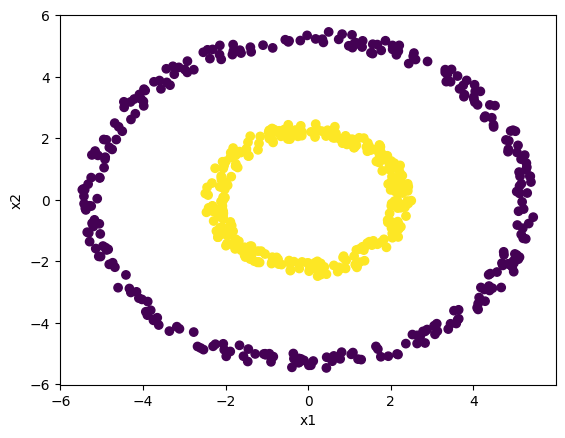

In [49]:
df['z'] = df.apply(lambda row: row['x1']**2 + row['x2']**2, axis=1)
print(df.head())

# Show the graph of x1 vs x2
# Label the points appropriately
plt.scatter(df['x1'], df['x2'], c=df['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

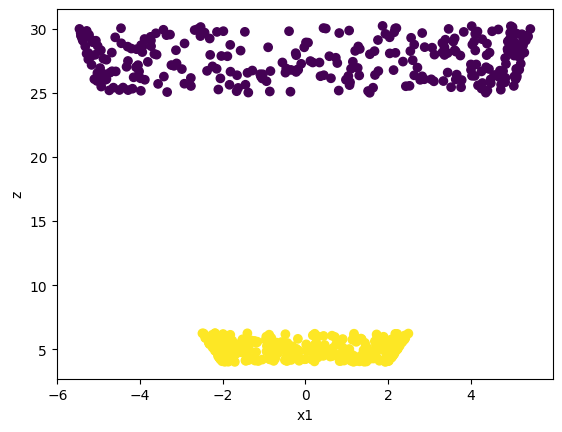

In [50]:
# Show the graph of x1 vs z
# Label the points appropriately
plt.scatter(df['x1'], df['z'], c=df['y'])
plt.xlabel('x1')
plt.ylabel('z')
plt.show()

### Plot Decision Boundary

Plotting SVM decision boundaries: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

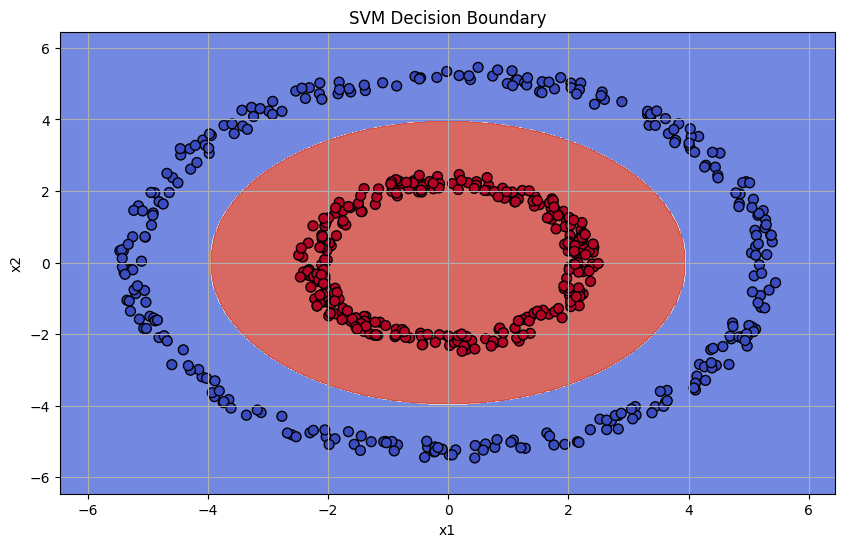

In [86]:
from sklearn.svm import SVC

# Apply linear svm and show the plot
X = df[['x1', 'x2', 'z']]
y = df['y']

svm_linear = SVC(kernel="linear", C=1.0, random_state=0)
svm_linear.fit(X, y)

# Create a mesh grid in the original x1 and x2 space
x1_min, x1_max = df['x1'].min() - 1, df['x1'].max() + 1
x2_min, x2_max = df['x2'].min() - 1, df['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))

# Compute z for each point in the grid to project the decision boundary
zz = xx**2 + yy**2
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel(), zz.ravel()], columns=['x1', 'x2', 'z'])
Z = svm_linear.predict(grid_points).reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(df['x1'], df['x2'], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()

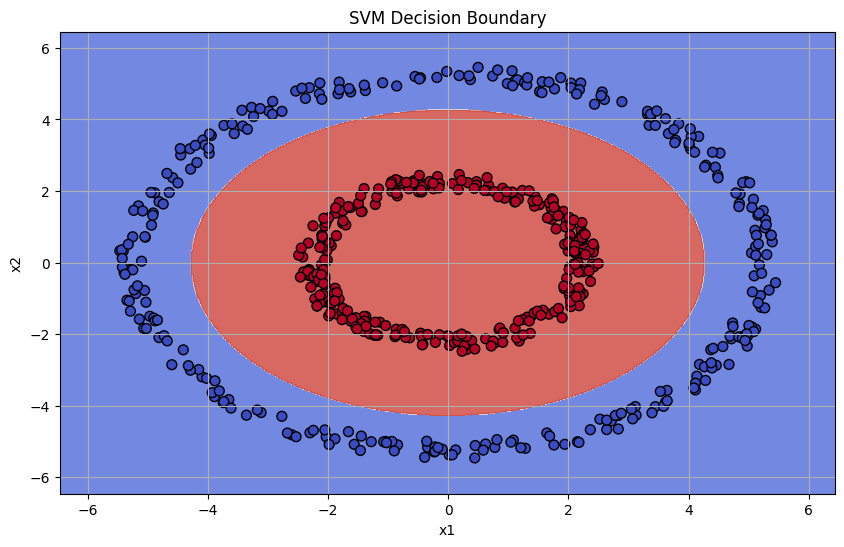

In [81]:
# Apply polynomial svm and show the plot

svm_poly = SVC(kernel="poly", C=1.0, degree=2, random_state=0)
svm_poly.fit(X, y)

# Create a mesh grid in the original x1 and x2 space
x1_min, x1_max = df['x1'].min() - 1, df['x1'].max() + 1
x2_min, x2_max = df['x2'].min() - 1, df['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))

# Compute z for each point in the grid to project the decision boundary
zz = xx**2 + yy**2
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel(), zz.ravel()], columns=['x1', 'x2', 'z'])
Z = svm_poly.predict(grid_points).reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(df['x1'], df['x2'], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()

### Radial Basis Function

This data is from `x1--, x2--, y--`

We will use $rbf(x_1, x_2,\gamma)$ kernel.

You have to find $\gamma$ parameter that gives the best result.

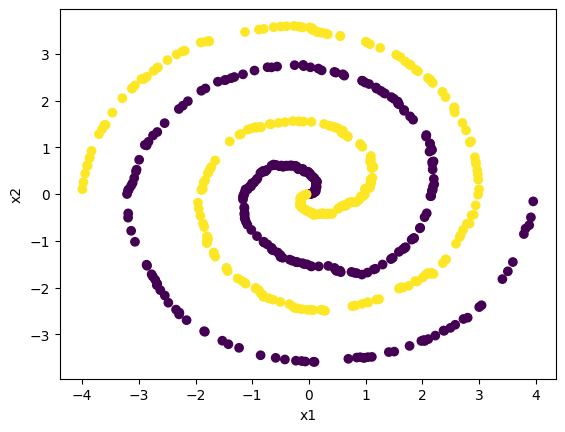

In [69]:
# Repeat the same steps
# Plot x1 vs x2

plt.scatter(df['x1--'], df['x2--'], c=df['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

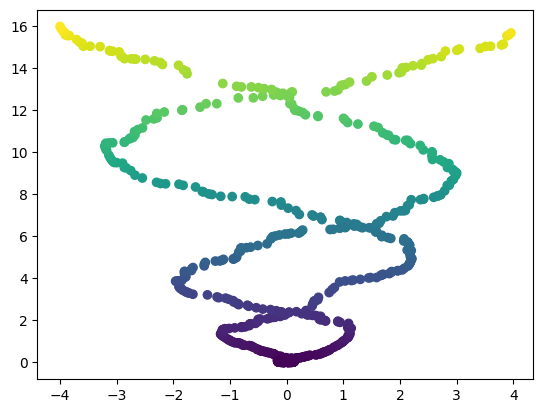

In [72]:
df['z--'] = df.apply(lambda row: row['x1--']**2 + row['x2--']**2, axis=1)

plt.scatter(df['x1--'], df['z--'], c=df['z--'], cmap='viridis')

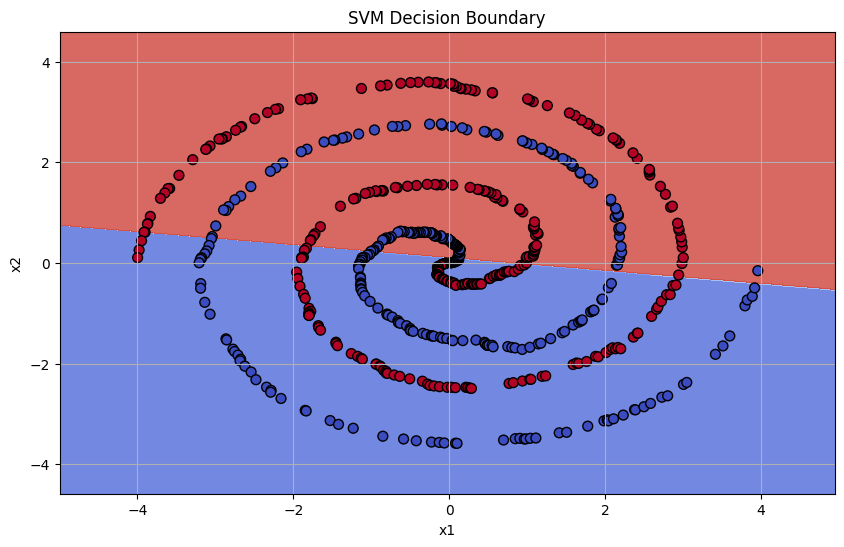

In [98]:
# Apply linear svm and show the plot
X = df[['x1--', 'x2--']]
y = df['y']

svm_linear = SVC(kernel="linear", C=100.0, random_state=0)
svm_linear.fit(X, y)

# Create a mesh grid in the original x1 and x2 space
x1_min, x1_max = df['x1--'].min() - 1, df['x1--'].max() + 1
x2_min, x2_max = df['x2--'].min() - 1, df['x2--'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))

# Compute z for each point in the grid to project the decision boundary
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1--', 'x2--'])
Z = svm_linear.predict(grid_points).reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(df['x1--'], df['x2--'], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()

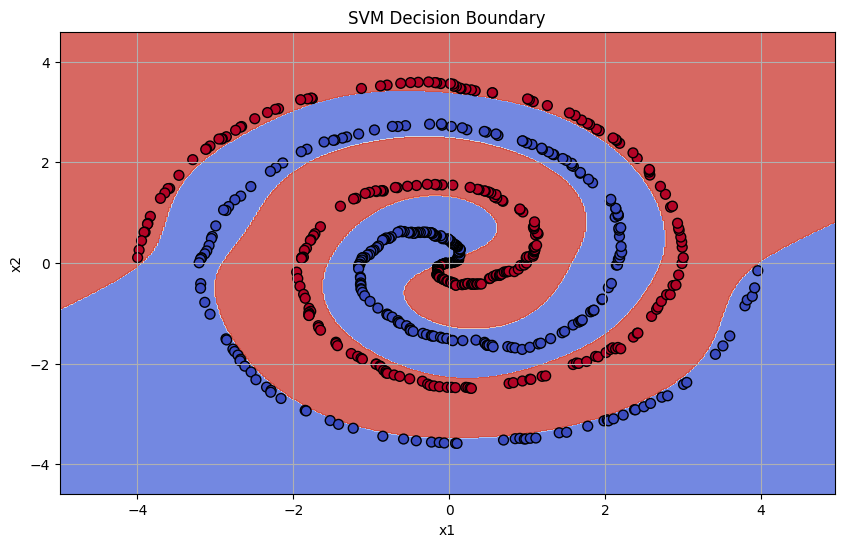

In [97]:
# Apply rbf kernel svm and show the plot
svm_poly = SVC(kernel="rbf", C=1000.0, random_state=0)
svm_poly.fit(X, y)

# Create a mesh grid in the original x1 and x2 space
x1_min, x1_max = df['x1--'].min() - 1, df['x1--'].max() + 1
x2_min, x2_max = df['x2--'].min() - 1, df['x2--'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))

grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1--', 'x2--'])
Z = svm_poly.predict(grid_points).reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(df['x1--'], df['x2--'], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()